In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
%config InlineBackend.figure_format='svg'
from datetime import datetime as dt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o modelo

In [3]:
data = pd.read_csv("dataced.csv", delimiter=';')

In [4]:
def converter(old):
   return int(dt.strftime(dt.strptime(old, '%d/%m/%Y'), '%m'))

In [5]:
for i in range(0,132,1):
    data.Data[i] = converter(data.Data[i])

C:\Users\JoseNeto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
data.columns = ['Mes', 'Evapo', 'Insol', 'Precip', 'TempMaxM', 'TempMinM', 'UmidRel', 'Casos', 'ChuvAc']
data['Mes'] = data['Mes'].astype(int)

In [7]:
data.head()

,Mes,Evapo,Insol,Precip,TempMaxM,TempMinM,UmidRel,Casos,ChuvAc
0,1,62.8,273.2,18.9,36.0,24.5,62.0,1,27.8
1,2,96.0,243.5,114.5,35.1,23.7,61.4,3,68.3
2,3,111.3,207.0,307.3,35.1,23.8,65.2,29,384.3
3,4,86.3,265.0,97.7,33.6,23.6,68.1,99,47.5
4,5,63.0,217.2,28.2,32.6,23.0,70.1,128,20.7


# Gráficos Iniciais

In [8]:
data.head()

,Mes,Evapo,Insol,Precip,TempMaxM,TempMinM,UmidRel,Casos,ChuvAc
0,1,62.8,273.2,18.9,36.0,24.5,62.0,1,27.8
1,2,96.0,243.5,114.5,35.1,23.7,61.4,3,68.3
2,3,111.3,207.0,307.3,35.1,23.8,65.2,29,384.3
3,4,86.3,265.0,97.7,33.6,23.6,68.1,99,47.5
4,5,63.0,217.2,28.2,32.6,23.0,70.1,128,20.7


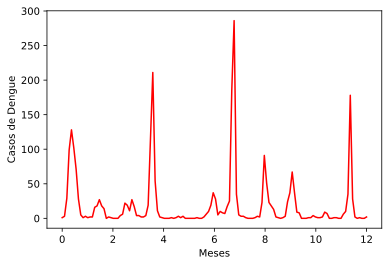

In [9]:
#Variação dos casos de dengue durante todos os anos

plt.plot(np.linspace(0, 12, 132), data.Casos, color='red') # Linspace retorna números espaçados de modo uniforme em um intervalo
plt.xlabel("Meses")
plt.ylabel("Casos de Dengue")
plt.show()

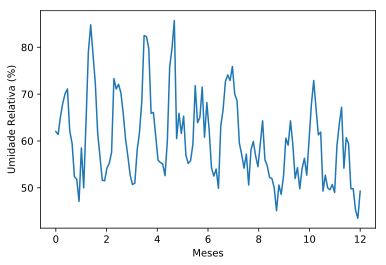

In [10]:
#Variação da Umidade Relativa do Ar durante todos os anos

plt.plot(np.linspace(0, 12, 132), data.UmidRel)
plt.xlabel("Meses")
plt.ylabel("Umidade Relativa (%)")
plt.show()


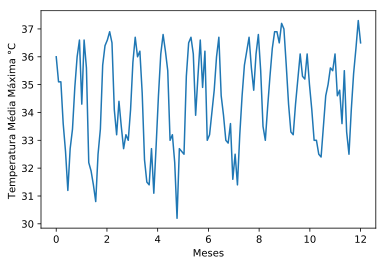

In [11]:
#Variação da Temperatura Média Máxima durante todos os anos

plt.plot(np.linspace(0, 12, 132), data.TempMaxM)
plt.xlabel("Meses")
plt.ylabel("Temperatura Média Máxima °C ")
plt.show()


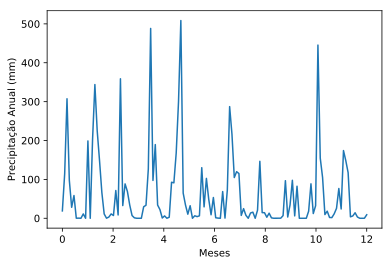

In [12]:
#Variação da Chuva durante todos os anos

plt.plot(np.linspace(0, 12, 132), data.Precip)
plt.xlabel("Meses")
plt.ylabel("Precipitação Anual (mm)")
plt.show()


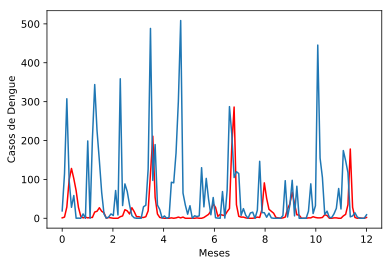

In [13]:
#Variação dos casos de dengue durante todos os anos

plt.plot(np.linspace(0, 12, 132), data.Casos, color='red') # Linspace retorna números espaçados de modo uniforme em um intervalo
plt.plot(np.linspace(0, 12, 132), data.Precip)
plt.xlabel("Meses")
plt.ylabel("Casos de Dengue")
plt.show()

# Manipulação dos Dados

In [14]:
#Variaveis que vão receber os valores mensais de cada variavel utilizada
chuva_jan, chuva_fev, chuva_mar, chuva_abr, chuva_mai, chuva_jun, chuva_jul, chuva_ago, chuva_set, chuva_out,chuva_nov, chuva_dez = [], [], [], [], [], [], [], [], [], [], [], [];
den_jan, den_fev, den_mar, den_abr, den_mai, den_jun, den_jul, den_ago, den_set, den_out, den_nov, den_dez = [], [], [], [], [], [], [], [], [], [], [], [];
umi_jan, umi_fev, umi_mar, umi_abr, umi_mai, umi_jun, umi_jul, umi_ago, umi_set, umi_out, umi_nov, umi_dez = [], [], [], [], [], [], [], [], [], [], [], [];
max_jan, max_fev, max_mar, max_abr, max_mai, max_jun, max_jul, max_ago, max_set, max_out, max_nov, max_dez = [], [], [], [], [], [], [], [], [], [], [], [];

In [15]:
#Copiar cada entrada dos dados para as novas variáveis 

for i in range (0,132,1):  
    if (data.Mes[i] == 1): #Todos os Meses de Janeiro
        den_jan.append(data.Casos[i]);
        chuva_jan.append(data.Precip[i]);
        umi_jan.append(data.UmidRel[i]);
        max_jan.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 2):  #Todos os Meses de Fevereiro
        den_fev.append(data.Casos[i]);
        chuva_fev.append(data.Precip[i]);
        umi_fev.append(data.UmidRel[i]);
        max_fev.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 3):  #Todos os Meses de Março
        den_mar.append(data.Casos[i]);
        chuva_mar.append(data.Precip[i]);
        umi_mar.append(data.UmidRel[i]);
        max_mar.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 4):  #Todos os Meses de Abril
        den_abr.append(data.Casos[i]);
        chuva_abr.append(data.Precip[i]);
        umi_abr.append(data.UmidRel[i]);
        max_abr.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 5):  #Todos os Meses de Maio
        den_mai.append(data.Casos[i]);
        chuva_mai.append(data.Precip[i]);
        umi_mai.append(data.UmidRel[i]);
        max_mai.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 6):  #Todos os Meses de Junho
        den_jun.append(data.Casos[i]);
        chuva_jun.append(data.Precip[i]);
        umi_jun.append(data.UmidRel[i]);
        max_jun.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 7):  #Todos os Meses de Julho
        den_jul.append(data.Casos[i]);
        chuva_jul.append(data.Precip[i]);
        umi_jul.append(data.UmidRel[i]);
        max_jul.append(data.TempMaxM[i]);
    
    if (data.Mes[i] == 8):  #Todos os Meses de Agosto
        den_ago.append(data.Casos[i]);
        chuva_ago.append(data.Precip[i]);
        umi_ago.append(data.UmidRel[i]);
        max_ago.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 9):  #Todos os Meses de Setembro
        den_set.append(data.Casos[i]);
        chuva_set.append(data.Precip[i]);
        umi_set.append(data.UmidRel[i]);
        max_set.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 10):  #Todos os Meses de Outubro
        den_out.append(data.Casos[i]);
        chuva_out.append(data.Precip[i]);
        umi_out.append(data.UmidRel[i]);
        max_out.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 11):  #Todos os Meses de Novembro
        den_nov.append(data.Casos[i]);
        chuva_nov.append(data.Precip[i]);
        umi_nov.append(data.UmidRel[i]);
        max_nov.append(data.TempMaxM[i]);
        
    if (data.Mes[i] == 12):  #Todos os Meses de Dezembro
        den_dez.append(data.Casos[i]);
        chuva_dez.append(data.Precip[i]);
        umi_dez.append(data.UmidRel[i]);
        max_dez.append(data.TempMaxM[i]);

In [16]:
#Armazenamto em um array os valores das variaveis

total_chuva_jan = np.asarray(chuva_jan)
total_chuva_fev = np.asarray(chuva_fev)
total_chuva_mar = np.asarray(chuva_mar)
total_chuva_abr = np.asarray(chuva_abr)
total_chuva_mai = np.asarray(chuva_mai)
total_chuva_jun = np.asarray(chuva_jun)
total_chuva_jul = np.asarray(chuva_jul)
total_chuva_ago = np.asarray(chuva_ago)
total_chuva_set = np.asarray(chuva_set)
total_chuva_out = np.asarray(chuva_out)
total_chuva_nov = np.asarray(chuva_nov)
total_chuva_dez = np.asarray(chuva_dez)

total_dengue_jan = np.asarray(den_jan)
total_dengue_fev = np.asarray(den_fev)
total_dengue_mar = np.asarray(den_mar)
total_dengue_abr = np.asarray(den_abr)
total_dengue_mai = np.asarray(den_mai)
total_dengue_jun = np.asarray(den_jun)
total_dengue_jul = np.asarray(den_jul)
total_dengue_ago = np.asarray(den_ago)
total_dengue_set = np.asarray(den_set)
total_dengue_out = np.asarray(den_out)
total_dengue_nov = np.asarray(den_nov)
total_dengue_dez = np.asarray(den_dez)

total_umidade_jan = np.asarray(umi_jan)
total_umidade_fev = np.asarray(umi_fev)
total_umidade_mar = np.asarray(umi_mar)
total_umidade_abr = np.asarray(umi_abr)
total_umidade_mai = np.asarray(umi_mai)
total_umidade_jun = np.asarray(umi_jun)
total_umidade_jul = np.asarray(umi_jul)
total_umidade_ago = np.asarray(umi_ago)
total_umidade_set = np.asarray(umi_set)
total_umidade_out = np.asarray(umi_out)
total_umidade_nov = np.asarray(umi_nov)
total_umidade_dez = np.asarray(umi_dez)


total_tempmax_jan = np.asarray(max_jan)
total_tempmax_fev = np.asarray(max_fev)
total_tempmax_mar = np.asarray(max_mar)
total_tempmax_abr = np.asarray(max_abr)
total_tempmax_mai = np.asarray(max_mai)
total_tempmax_jun = np.asarray(max_jun)
total_tempmax_jul = np.asarray(max_jul)
total_tempmax_ago = np.asarray(max_ago)
total_tempmax_set = np.asarray(max_set)
total_tempmax_out = np.asarray(max_out)
total_tempmax_nov = np.asarray(max_dez)
total_tempmax_dez = np.asarray(max_jan)

In [17]:
total_chuva_jan.mean()

65.690909090909088

In [18]:
#Criar um vetor com as médias das variaveis em todos os meses

dengue=[total_dengue_jan.mean(), total_dengue_fev.mean(), total_dengue_mar.mean(), total_dengue_abr.mean(), total_dengue_mai.mean(), total_dengue_jun.mean(), total_dengue_jul.mean(), total_dengue_ago.mean(), total_dengue_set.mean(), total_dengue_out.mean(), total_dengue_nov.mean(), total_dengue_dez.mean()]

In [19]:
chuvas=[total_chuva_jan.mean(), total_chuva_fev.mean(), total_chuva_mar.mean(), total_chuva_abr.mean(), total_chuva_mai.mean(), total_chuva_jun.mean(), total_chuva_jul.mean(), total_chuva_ago.mean(), total_chuva_set.mean(), total_chuva_out.mean(), total_chuva_nov.mean(), total_chuva_dez.mean()]


In [20]:
umidade=[total_umidade_jan.mean(), total_umidade_fev.mean(), total_umidade_mar.mean(), total_umidade_abr.mean(), total_umidade_mai.mean(), total_umidade_jun.mean(), total_umidade_jun.mean(), total_umidade_jul.mean(), total_umidade_ago.mean(), total_umidade_out.mean(), total_umidade_nov.mean(), total_umidade_dez.mean()]

In [21]:
tempmax=[total_tempmax_jan.mean(), total_tempmax_fev.mean(), total_tempmax_mar.mean(), total_tempmax_abr.mean(), total_tempmax_mai.mean(), total_tempmax_jun.mean(), total_tempmax_jun.mean(), total_tempmax_jul.mean(), total_tempmax_ago.mean(), total_tempmax_out.mean(), total_tempmax_nov.mean(), total_tempmax_dez.mean()]

# Gráficos Pós Separação dos Dados

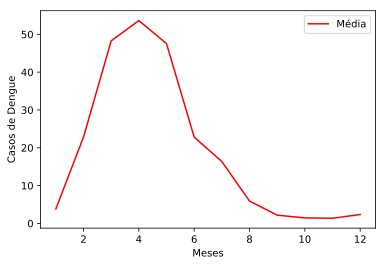

In [22]:
#Media de Casos de Dengue durante o todos os anos

plt.plot(range(1,13,1),dengue, color='r', label='Média')
plt.xlabel('Meses')
plt.ylabel('Casos de Dengue')
plt.legend()
plt.show()

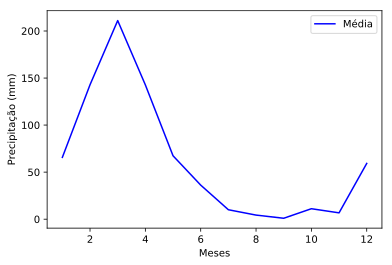

In [23]:
#Media da Chuva durante o todos os anos

plt.plot(range(1,13,1),chuvas, color='b', label='Média')
plt.xlabel('Meses')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.show()

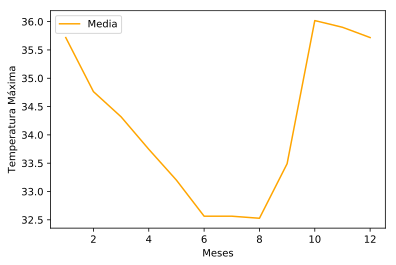

In [24]:
#Media da Temperatura durante o todos os anos

plt.plot(range(1,13,1),tempmax, color='orange', label='Media')
plt.xlabel('Meses')
plt.ylabel('Temperatura Máxima')
plt.legend()
plt.show()

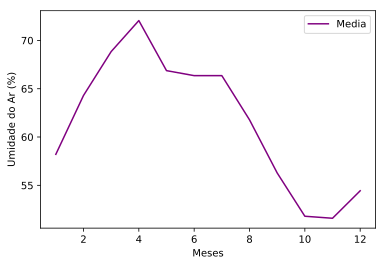

In [25]:
#Media da Umidade Relativa do Ar durante o todos os anos

plt.plot(range(1,13,1),umidade, color='purple', label='Media')
plt.xlabel('Meses')
plt.ylabel('Umidade do Ar (%)')
plt.legend()
plt.show()

# Analise Estatisticas em Gráficos de Pizza

In [26]:
# Nesta etapa, identificaremos o meses que não foram identificados casos de dengue durante todos os anos
meses_sem_dengue = [];

for i in range (0,132,1):
    if (data.Casos[i] == 0):
        meses_sem_dengue.append(data.get_value(i, 'Mes'))

In [27]:
#Criar um dataframe com os meses
dfdengue = pd.DataFrame(meses_sem_dengue)
dfdengue.columns = ['Mes']

In [28]:
# Separaremos os meses de acordo com o semestre do ano

primeiro_semestre =0;
segundo_semestre =0;
    
for i in range (0,len(dfdengue),1):
    if (dfdengue.Mes[i] <= 6):
        primeiro_semestre += 1;
    if (dfdengue.Mes[i] > 6):
        segundo_semestre += 1;


In [29]:
print("Numero de meses do primeiro semestre sem casos notificados de dengue: ", primeiro_semestre)
print("Numero de meses do segundo semestre sem casos notificados de dengue: ", segundo_semestre)

Numero de meses do primeiro semestre sem casos notificados de dengue:  5
Numero de meses do segundo semestre sem casos notificados de dengue:  24


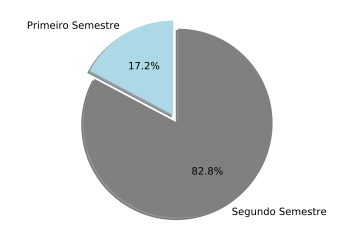

In [30]:
labels = ['Primeiro Semestre', 'Segundo Semestre']
titulos = [primeiro_semestre, segundo_semestre]
cores = ['lightblue', 'gray']
explode = (0.1, 0)  # somente explode primeiro pedaço
total = sum(titulos)
plt.pie(titulos, explode=explode, labels=labels, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

In [31]:
#Faremos a mesma coisa, mas com os meses que não apresentaram chuva
meses_sem_chuva = [];

for i in range (0,132,1):
    if (data.Precip[i] == 0):
        meses_sem_chuva.append(data.get_value(i, 'Mes'))

In [32]:
meses_sem_chuva

[9, 11, 1, 9, 10, 11, 10, 9, 9, 9, 12, 8, 9, 10, 7, 8, 9, 10, 9, 10, 11]

In [33]:
dfch = pd.DataFrame(meses_sem_chuva)
dfch.columns = ['Mes']

In [34]:
primeiro_semestre_chuva =0;
segundo_semestre_chuva =0;
    
for i in range (0,len(dfch),1):
    if (dfch.Mes[i] <= 6):
        primeiro_semestre_chuva += 1;
    if (dfch.Mes[i] > 6):
        segundo_semestre_chuva += 1;

In [35]:
print("Numero de meses do primeiro semestre sem casos notificados de dengue: ", primeiro_semestre_chuva)
print("Numero de meses do segundo semestre sem casos notificados de dengue: ", segundo_semestre_chuva)

Numero de meses do primeiro semestre sem casos notificados de dengue:  1
Numero de meses do segundo semestre sem casos notificados de dengue:  20


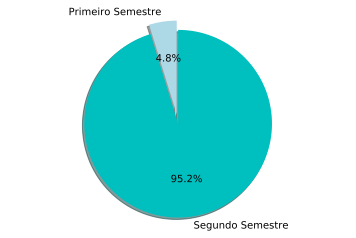

In [36]:

labels = ['Primeiro Semestre', 'Segundo Semestre']
titulos = [primeiro_semestre_chuva, segundo_semestre_chuva]
cores = ['lightblue', 'c']
explode = (0.1, 0)  # somente explode primeiro pedaço
total = sum(titulos)
plt.pie(titulos, explode=explode, labels=labels, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

# Análise de Correlação

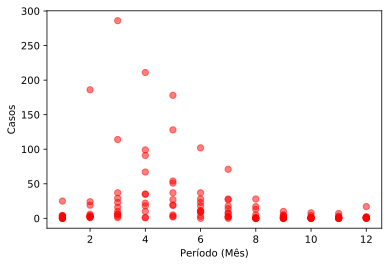

In [37]:
#Utilizaremos o gráfico scatter para identificar a relação entre duas variáveis

# Aqui, entre a Data (mes) e os Casos de Dengue
plt.scatter(data.Mes, data.Casos, c = 'r', s = 40, alpha = 0.5)
plt.xlabel("Período (Mês)")
plt.ylabel("Casos")
plt.show()

In [38]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados, metodo, size=8):    
    corr = dados.corr(method=metodo)    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

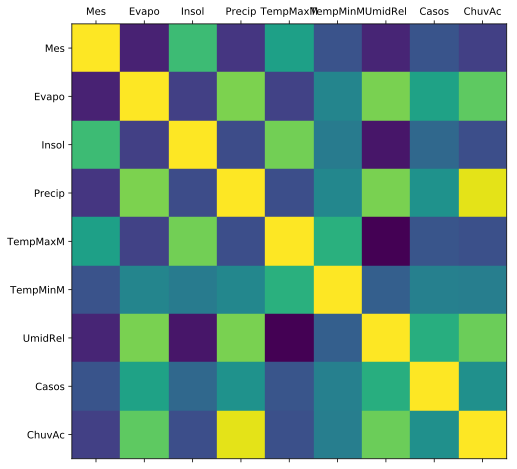

In [39]:
plot_corr(data, "pearson") #Correlação de Pearson



In [40]:
data.corr(method = 'pearson')

,Mes,Evapo,Insol,Precip,TempMaxM,TempMinM,UmidRel,Casos,ChuvAc
Mes,1.000000,-0.546677,0.462597,-0.440004,0.258567,-0.270384,-0.535268,-0.264082,-0.388994
Evapo,-0.546677,1.000000,-0.386353,0.661828,-0.370813,0.067532,0.656652,0.277788,0.578360
Insol,0.462597,-0.386353,1.000000,-0.310527,0.638670,0.003490,-0.606804,-0.130633,-0.299117
Precip,-0.440004,0.661828,-0.310527,1.000000,-0.301154,0.079277,0.658226,0.161807,0.931794
TempMaxM,0.258567,-0.370813,0.638670,-0.301154,1.000000,0.371822,-0.711300,-0.257147,-0.295939
TempMinM,-0.270384,0.067532,0.003490,0.079277,0.371822,1.000000,-0.195378,0.035331,0.020302
UmidRel,-0.535268,0.656652,-0.606804,0.658226,-0.711300,-0.195378,1.000000,0.360203,0.613507
Casos,-0.264082,0.277788,-0.130633,0.161807,-0.257147,0.035331,0.360203,1.000000,0.148976
ChuvAc,-0.388994,0.578360,-0.299117,0.931794,-0.295939,0.020302,0.613507,0.148976,1.000000


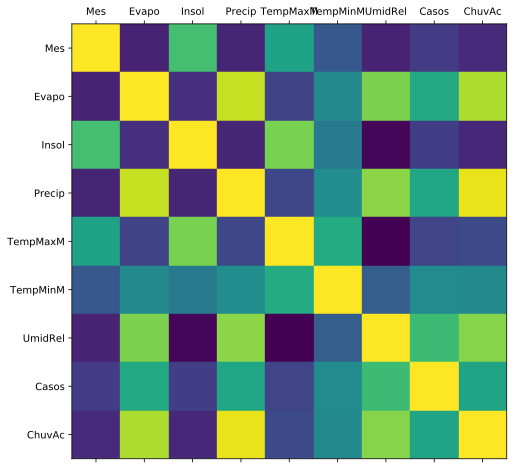

In [41]:
plot_corr(data, "spearman") #Correlação de Spearman
#O coeficiente de correlação de Spearman é indicado para o cálculo da correlação entre variáveis aleatórias x e y relacionadas monotonicamente entre si, mas não necessariamente de maneira linear. Se a relação é linear o método de Pearson é o mais indicado.

In [42]:
data.corr(method = 'spearman')

,Mes,Evapo,Insol,Precip,TempMaxM,TempMinM,UmidRel,Casos,ChuvAc
Mes,1.000000,-0.557020,0.487855,-0.541503,0.268464,-0.243307,-0.554314,-0.420573,-0.516223
Evapo,-0.557020,1.000000,-0.489816,0.850898,-0.365825,0.088012,0.663801,0.325700,0.791841
Insol,0.487855,-0.489816,1.000000,-0.531765,0.653564,-0.000508,-0.688544,-0.398706,-0.529355
Precip,-0.541503,0.850898,-0.531765,1.000000,-0.346966,0.126003,0.698857,0.295190,0.940912
TempMaxM,0.268464,-0.365825,0.653564,-0.346966,1.000000,0.336921,-0.718262,-0.357426,-0.334282
TempMinM,-0.243307,0.088012,-0.000508,0.126003,0.336921,1.000000,-0.199101,0.110461,0.091122
UmidRel,-0.554314,0.663801,-0.688544,0.698857,-0.718262,-0.199101,1.000000,0.462046,0.687940
Casos,-0.420573,0.325700,-0.398706,0.295190,-0.357426,0.110461,0.462046,1.000000,0.283505
ChuvAc,-0.516223,0.791841,-0.529355,0.940912,-0.334282,0.091122,0.687940,0.283505,1.000000


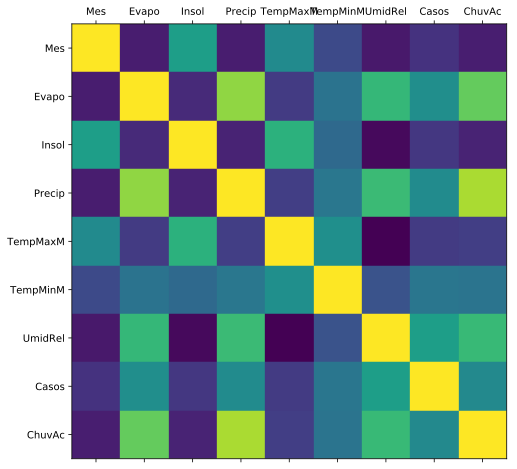

In [43]:
plot_corr(data, "kendall") #Correlação de Kendall

#É uma medida de correlação de postos, ou seja, verifica a semelhança entre as ordens dos dados quando classificados por cada uma das quantidades. 

In [44]:
data.corr(method = 'kendall')

,Mes,Evapo,Insol,Precip,TempMaxM,TempMinM,UmidRel,Casos,ChuvAc
Mes,1.000000,-0.398056,0.329378,-0.397802,0.207478,-0.178582,-0.414321,-0.297153,-0.390727
Evapo,-0.398056,1.000000,-0.340095,0.745427,-0.253665,0.061638,0.492033,0.232440,0.639733
Insol,0.329378,-0.340095,1.000000,-0.367448,0.459671,-0.000701,-0.481684,-0.272738,-0.367706
Precip,-0.397802,0.745427,-0.367448,1.000000,-0.236889,0.083797,0.516789,0.210762,0.807758
TempMaxM,0.207478,-0.253665,0.459671,-0.236889,1.000000,0.236453,-0.519490,-0.255789,-0.234912
TempMinM,-0.178582,0.061638,-0.000701,0.083797,0.236453,1.000000,-0.131816,0.077834,0.065596
UmidRel,-0.414321,0.492033,-0.481684,0.516789,-0.519490,-0.131816,1.000000,0.330145,0.504843
Casos,-0.297153,0.232440,-0.272738,0.210762,-0.255789,0.077834,0.330145,1.000000,0.198159
ChuvAc,-0.390727,0.639733,-0.367706,0.807758,-0.234912,0.065596,0.504843,0.198159,1.000000


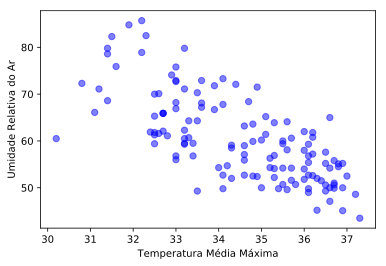

In [45]:
plt.scatter(data.TempMaxM, data.UmidRel, c = 'b', s = 40, alpha = 0.5)
plt.xlabel("Temperatura Média Máxima")
plt.ylabel("Umidade Relativa do Ar")
plt.show()

# Predição

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o modelo

In [47]:
# Variáveis 
#atributos = ["Precip", "Casos", "UmidRel", "TempMaxM"]
atributos = ["Precip"]
label = ["Casos"]

In [48]:
x = data[atributos]

In [49]:
y = data[label]

In [50]:
modelo = LinearRegression()

In [51]:
modelo.fit(x, y) #Treinamento do modelo utilizando as variaveis Precipitação e Casos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
#Prever casos de dengue pela quantidade de chuvas
modelo.predict([40][0])

array([[ 17.44692681]])

In [53]:
def prever (quant_chuvas):
    return float(modelo.predict([quant_chuvas][0]))

In [54]:
#Prever os casos de dengue pela chuva, de casa mês do ano

pred_casos_jan, pred_casos_fev, pred_casos_mar, pred_casos_abr, pred_casos_mai, pred_casos_jun, pred_casos_jul, pred_casos_ago, pred_casos_set, pred_casos_out, pred_casos_nov, pred_casos_dez= [], [], [], [], [], [], [], [], [], [], [], []

for i in range(0,11,1):
    pred_casos_jan.append(prever(total_dengue_jan[i]))
    pred_casos_fev.append(prever(total_dengue_fev[i]))
    pred_casos_mar.append(prever(total_dengue_mar[i]))
    pred_casos_abr.append(prever(total_dengue_abr[i]))
    pred_casos_mai.append(prever(total_dengue_mai[i]))
    pred_casos_jun.append(prever(total_dengue_jun[i]))
    pred_casos_jul.append(prever(total_dengue_jul[i]))
    pred_casos_ago.append(prever(total_dengue_ago[i]))
    pred_casos_set.append(prever(total_dengue_set[i]))
    pred_casos_out.append(prever(total_dengue_out[i]))
    pred_casos_nov.append(prever(total_dengue_nov[i]))
    pred_casos_dez.append(prever(total_dengue_dez[i]))

In [55]:
#Criar um array com os valores preditos de cada mês

pred_jan = np.asarray(pred_casos_jan)
pred_fev = np.asarray(pred_casos_fev)
pred_mar = np.asarray(pred_casos_mar)
pred_abr = np.asarray(pred_casos_abr)
pred_mai = np.asarray(pred_casos_mai)
pred_jun = np.asarray(pred_casos_jun)
pred_jul = np.asarray(pred_casos_jul)
pred_ago = np.asarray(pred_casos_ago)
pred_set = np.asarray(pred_casos_set)
pred_out = np.asarray(pred_casos_out)
pred_nov = np.asarray(pred_casos_nov)
pred_dez = np.asarray(pred_casos_dez)

In [58]:
#Criar uma lista com as medias dos valores preditos de cada mês, "Pela chuva"
dengue_pred = [pred_jan.mean(), pred_fev.mean(), pred_mar.mean(), pred_abr.mean(), pred_mai.mean(), pred_jun.mean(), pred_jul.mean(), pred_ago.mean(), pred_set.mean(), pred_out.mean(), pred_nov.mean(), pred_dez.mean()]

In [64]:
dengue

[3.8181818181818183,
 22.818181818181817,
 48.272727272727273,
 53.636363636363633,
 47.545454545454547,
 22.818181818181817,
 16.363636363636363,
 5.9090909090909092,
 2.1818181818181817,
 1.4545454545454546,
 1.3636363636363635,
 2.3636363636363638]

In [65]:
dengue_pred

[14.952947822503885,
 16.26260010407897,
 18.01715818465803,
 18.38686863735148,
 17.967027953784342,
 16.26260010407897,
 15.817694305074992,
 15.097072236265735,
 14.840154803038086,
 14.790024572164397,
 14.783758293305187,
 14.85268736075651]

In [1]:
#Não sei porque, mas os graficos abaixo dda media de casos de dengue e a media predita geraram o mesmo gráfico, mas em intervalos diferentes

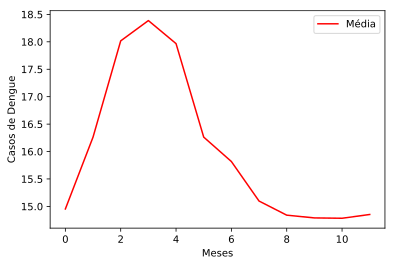

In [63]:
#Media de Casos de Dengue durante o todos os anos

plt.plot(range(0,12,1),dengue_pred, color='r', label='Média')
plt.xlabel('Meses')
plt.ylabel('Casos de Dengue')
plt.legend()
plt.show()

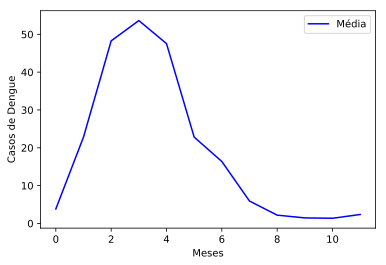

In [62]:
#Media de Casos de Dengue durante o todos os anos

plt.plot(range(0,12,1),dengue, color='b', label='Média')
plt.xlabel('Meses')
plt.ylabel('Casos de Dengue')
plt.legend()
plt.show()